In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import pandas as pd
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/ML/python/data/labeled_data.csv',delimiter=',')

df.dtypes

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [2]:
df.drop(['Unnamed: 0','count'],axis=1,inplace=True)
df.duplicated().sum()
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

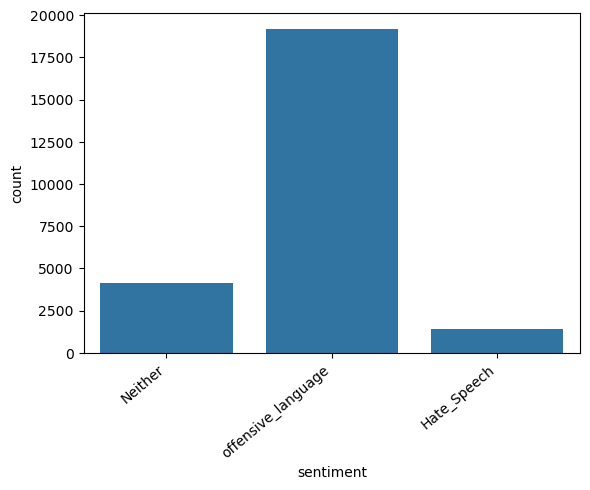

In [3]:
df['sentiment'] = df['class'].map({0:'Hate_Speech',1:'offensive_language',
                                  2: 'Neither'})


fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()


In [4]:
#cleaning text
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('<.*?>+', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('rt', '',text)
    text = re.sub('\d', '',text)
    text = re.sub('\w*\d\w*', '', text)
    
    text = re.sub('  ',' ',text)
    

    
    return text


df['tweet'] = df['tweet'].apply(clean_text)

df['tweet'].head(10)

0     mayasolovely as a woman you shouldnt complain...
1     mleew boy dats coldtyga dwn bad for cuffin da...
2     urkindofbrand dawg sbabylife you ever fuck a ...
3          cganderson vivabased she look like a tranny
4     shenikarobes the shit you hear about me might...
5    tmadisonx the shit just blows meclaim you so f...
6    brighterdays i can not just sit up and hate on...
7    selfiequeenbri cause im tired of you big bitch...
8     amp you might not get ya bitch back amp thats...
9     rhythmixx hobbies include fighting mariam\n\n...
Name: tweet, dtype: object

In [5]:
#stop word removal,tokenization,lemmatization
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['tweet'] = df['tweet'].apply(remove_stopwords)


In [6]:
lemma = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)


df['tweet'] = df['tweet'].apply(lemmatization)

df['tweet'].head(10)

0    mayasolovely woman shouldnt complain cleaning ...
1    mleew boy dat coldtyga dwn bad cuffin dat hoe ...
2    urkindofbrand dawg sbabylife ever fuck bitch s...
3                cganderson vivabased look like tranny
4    shenikarobes shit hear might true might faker ...
5    tmadisonx shit blow meclaim faithful somebody ...
6    brighterdays sit hate another bitch got much s...
7    selfiequeenbri cause im tired big bitch coming...
8                amp might get ya bitch back amp thats
9        rhythmixx hobby include fighting mariam bitch
Name: tweet, dtype: object

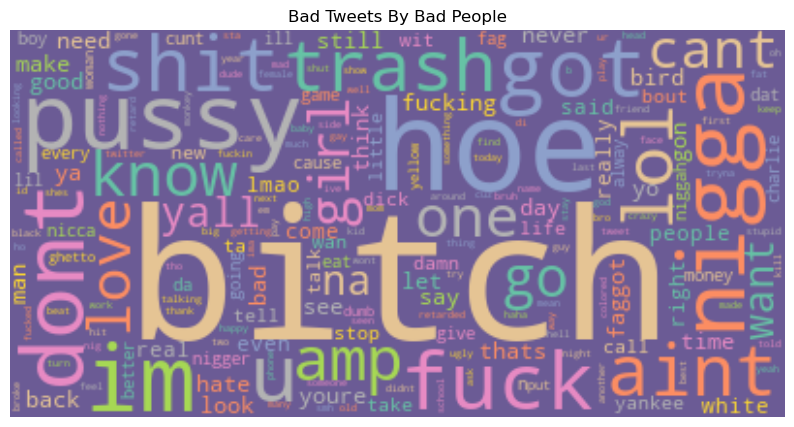

In [7]:
#worcloud to visualize most frequent words
#### I DO NOT PROMOTE THIS LANGAUGE


from wordcloud import WordCloud

text = " ".join(i for i in df.tweet)

wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Tweets By Bad People")
plt.show()


In [8]:
#I did not come up with this
# I did not say this
# this is public domain
# I did not say these words
#these people did and shame you them(you possibly)


print(text.count("bitch"))
print(text.count("bitches"))
print(text.count("nigga"))
print(text.count("niggas"))
print(text.count("hoe"))
print(text.count("trash"))
print(text.count("pussy"))
print(text.count("fuck"))
print(text.count("fucking"))
print(text.count("love"))
print(text.count("faggot"))

11597
49
2489
25
4561
1188
2287
2754
654
951
547


In [9]:
Hate_tweet = (df['sentiment'] == "Hate_Speech").astype('int32')
Hate_tweet.describe()

offensive_tweets = (df['sentiment'] == "offensive_language").astype('int32')
offensive_tweets.describe()

neither = (df['sentiment'] == "Neither").astype('int32')
neither.value_counts()


sentiment
0    20620
1     4163
Name: count, dtype: int64

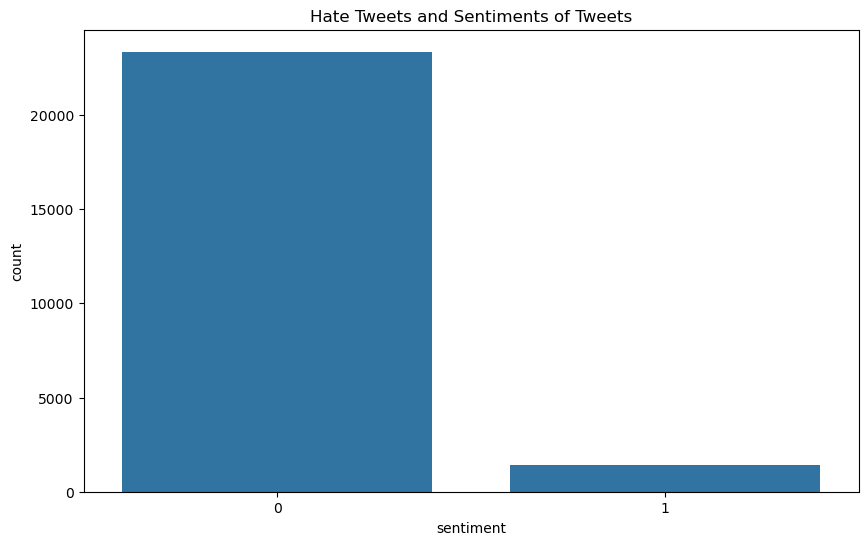

In [10]:
#ok, more uncessary hatred


plt.figure(figsize=(10,6))
sns.countplot(x=Hate_tweet)
plt.title("Hate Tweets and Sentiments of Tweets")
plt.xticks()
plt.show()

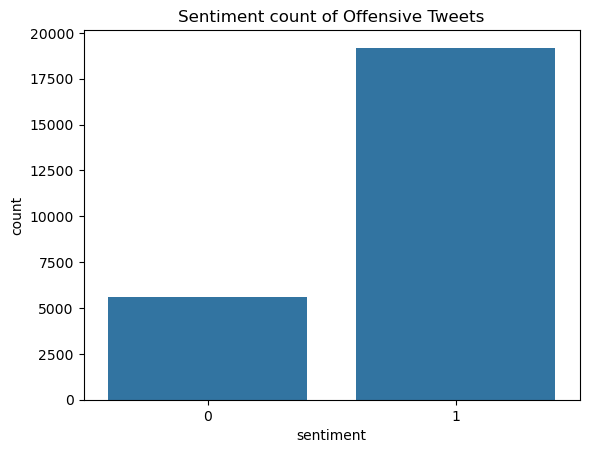

In [11]:
#sentiment count of offensive tweets
sns.countplot(x=offensive_tweets)
plt.title("Sentiment count of Offensive Tweets")
plt.show()

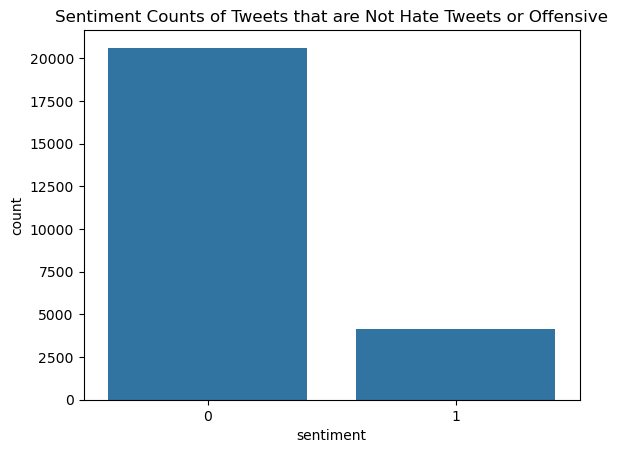

In [12]:
sns.countplot(x=neither)
plt.title("Sentiment Counts of Tweets that are Not Hate Tweets or Offensive")
plt.show()


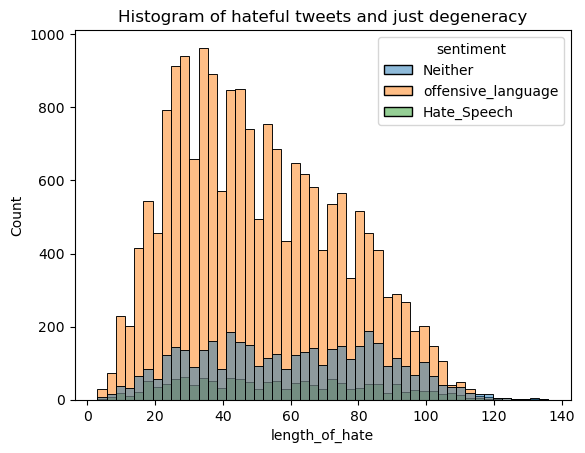

In [13]:
#length of tweets


df['length_of_hate'] = df['tweet'].apply(len)

sns.histplot(x='length_of_hate',hue='sentiment',data=df)
plt.title('Histogram of hateful tweets and just degeneracy')
plt.show()

In [14]:
#train/test split using machine learning models with no deep learning
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_ = df['tweet']
X_ = cv.fit_transform(X_).toarray()
y_ = df['class']


X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=.20,random_state=42)


from sklearn.naive_bayes import MultinomialNB,BernoulliNB
BNB = BernoulliNB()
MNB = MultinomialNB()


from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
lr = LogisticRegression()
PA = PassiveAggressiveClassifier()


from sklearn.metrics import accuracy_score,classification_report


def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Clf RPT-- {clf_rpt}')
    return pred

lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)
BNB_pred = evaluate_model(X_train, X_test, y_train, y_test, BNB)

LogisticRegression, --Accuracy-- 89.55%; --Clf RPT--               precision    recall  f1-score   support

           0       0.45      0.20      0.28       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.88      0.85       835

    accuracy                           0.90      4957
   macro avg       0.74      0.68      0.69      4957
weighted avg       0.88      0.90      0.89      4957

PassiveAggressiveClassifier, --Accuracy-- 86.46%; --Clf RPT--               precision    recall  f1-score   support

           0       0.34      0.40      0.37       290
           1       0.92      0.92      0.92      3832
           2       0.81      0.78      0.80       835

    accuracy                           0.86      4957
   macro avg       0.69      0.70      0.70      4957
weighted avg       0.87      0.86      0.87      4957

MultinomialNB, --Accuracy-- 86.50%; --Clf RPT--               precision    recall  f1-score   support

           0       0

In [15]:
#Train/test split using keras
X = df['tweet']
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15, random_state=42)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding, Dense,SpatialDropout1D
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [16]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print(max_length)

25


In [17]:
from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,25,padding='post')
X_test = pad_sequences(X_test,25,padding='post')




RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=50, input_length=25))
RNN.add(SpatialDropout1D(0.2))
RNN.add(LSTM(25, dropout=0.2,recurrent_dropout=0.2))
RNN.add(Dense(3, activation='sigmoid'))
RNN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
batch_size = 64

history = RNN.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_data=(X_test,y_test))
results = RNN.evaluate(X_test,y_test)
pred = RNN.predict(X_test)

Epoch 1/10
330/330 [==============================] - 10s 23ms/step - loss: 0.3586 - accuracy: 0.7958 - val_loss: 0.2393 - val_accuracy: 0.8505
Epoch 2/10
330/330 [==============================] - 7s 22ms/step - loss: 0.1993 - accuracy: 0.8949 - val_loss: 0.2169 - val_accuracy: 0.8870
Epoch 3/10
330/330 [==============================] - 7s 23ms/step - loss: 0.1503 - accuracy: 0.9233 - val_loss: 0.2400 - val_accuracy: 0.8749
Epoch 4/10
330/330 [==============================] - 7s 23ms/step - loss: 0.1155 - accuracy: 0.9414 - val_loss: 0.2464 - val_accuracy: 0.8720
Epoch 5/10
330/330 [==============================] - 8s 23ms/step - loss: 0.0856 - accuracy: 0.9589 - val_loss: 0.3070 - val_accuracy: 0.8677
Epoch 6/10
330/330 [==============================] - 8s 23ms/step - loss: 0.0634 - accuracy: 0.9731 - val_loss: 0.3088 - val_accuracy: 0.8626
Epoch 7/10
330/330 [==============================] - 8s 23ms/step - loss: 0.0492 - accuracy: 0.9780 - val_loss: 0.3399 - val_accuracy: 0.870

In [18]:
print(results)
print("Max Accuracy: ",max(history.history['accuracy']))
print("Max vallidation accuracy: ",max(history.history['val_accuracy']))

[0.376621812582016, 0.8719741702079773]
Max Accuracy:  0.9872300028800964
Max vallidation accuracy:  0.8870360255241394


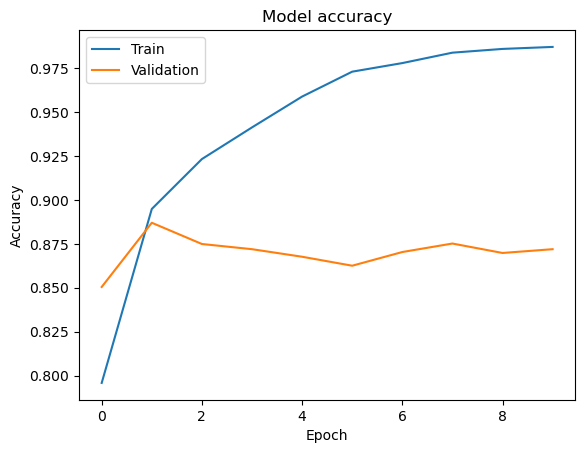

In [19]:
#training and val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


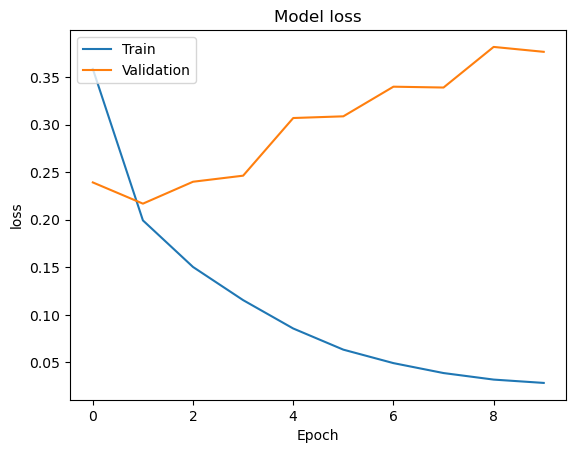

In [20]:
#training and evaluation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
